# Este dataset descreve os salários de diferentes postos de trabalho na área dos dados, oferecendo algum detalhe sobre aspetos como o país, o tamanho da empresa ou o tipo de contrato

In [6]:
import pandas as pd

df_jobs = pd.read_csv('./jobs_in_data (er).csv')

In [7]:
df_jobs.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [8]:
df_jobs.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [9]:

df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


### Pretende-se perceber como tem evoluído, ao longo dos anos, o salário médio na área dos dados e o salário para a posição de “Data Scientist”. O salário de um Data Scientist tem estado acima ou abaixo da média? Tem subido de ano para ano ou descido? Responda de forma fundamentada.

1. Calcular o salário médio global na área dos dados ao longo dos anos.
2. Calcular o salário médio específico para a posição de "Data Scientist" ao longo dos anos.
3. Comparar as duas evoluções ao longo do tempo e verificar se os salários dos Data cientists estão acima ou abaixo da média global.

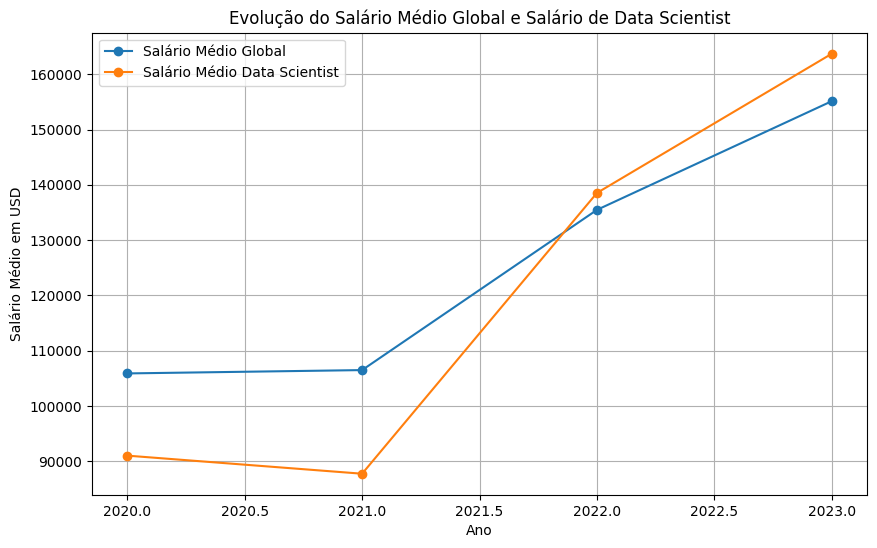

,work_year,global_avg_salary,ds_avg_salary
0,2020,105878.859155,91008.684211
1,2021,106483.644670,87735.970588
2,2022,135467.501836,138529.095477
3,2023,155132.591708,163713.765280


In [10]:
import matplotlib.pyplot as plt

# Filtrar apenas os dados para "Data Scientist"
df_data_scientist = df_jobs[df_jobs["job_title"] == "Data Scientist"]

# Calcular a média salarial por ano para a área global e para Data Scientists
salary_by_year = df_jobs.groupby("work_year")["salary_in_usd"].mean().reset_index(name="global_avg_salary")
salary_ds_by_year = df_data_scientist.groupby("work_year")["salary_in_usd"].mean().reset_index(name="ds_avg_salary")

# Juntar as duas tabelas para comparação
salary_comparison = pd.merge(salary_by_year, salary_ds_by_year, on="work_year", how="left")

# Criar gráfico para comparação
plt.figure(figsize=(10, 6))
plt.plot(salary_comparison["work_year"], salary_comparison["global_avg_salary"], marker='o', label="Salário Médio Global")
plt.plot(salary_comparison["work_year"], salary_comparison["ds_avg_salary"], marker='o', label="Salário Médio Data Scientist")
plt.title("Evolução do Salário Médio Global e Salário de Data Scientist")
plt.xlabel("Ano")
plt.ylabel("Salário Médio em USD")
plt.legend()
plt.grid(True)
plt.show()

salary_comparison


Observações:
Evolução do Salário Médio Global:

O salário médio na área dos dados subiu consistentemente ao longo dos anos:
2020: $105,878
2021: $106,483
2022: $135,467
2023: $155,132
Salário Médio para "Data Scientist":

O salário para a posição de Data Scientist apresentou a seguinte tendência:
2020: $91,008 (abaixo da média global)
2021: $87,735 (abaixo da média global)
2022: $138,529 (acima da média global)
2023: $163,713 (acima da média global)
Comparação entre Salários:

Entre 2020 e 2021, os Data Scientists recebiam abaixo da média global.
A partir de 2022, o salário dos Data Scientists superou a média global e continuou a aumentar em 2023.
Conclusão:
O salário dos Data Scientists tem estado abaixo da média global até 2021, mas superou a média em 2022 e 2023.
Tanto o salário global como o salário de Data Scientists têm apresentado uma tendência de crescimento ao longo dos anos, com uma subida mais expressiva a partir de 2022

### Considere que lhe era pedido que treinasse um modelo de Machine Learning para prever os salários dos postos de trabalho nesta área. Indique, justificando, que variáveis independentes e dependente consideraria?


#### Variável Dependente (Target):
salary_in_usd: O salário convertido para USD é a variável dependente ideal, pois permite comparar os salários de forma consistente, independentemente da moeda.

#### Variáveis Independentes (Features):
As variáveis independentes devem incluir os fatores mais relevantes que possam influenciar o salário. Com base nos dados fornecidos, consideraria:

job_title (Título do posto de trabalho):

Postos diferentes têm salários diferentes (ex: Data Engineer vs Data Scientist).
Justificação: Esta variável é altamente correlacionada com o salário, pois reflete o nível de responsabilidade e competências necessárias.
experience_level (Nível de experiência):

Ex: Junior, Mid-level, Senior, Executive.
Justificação: Níveis de experiência mais altos estão associados a salários mais elevados.
employment_type (Tipo de contrato):

Ex: Full-time, Part-time, Freelance, Contract.
Justificação: Contratos "Full-time" geralmente oferecem salários mais estáveis, enquanto "Freelance" pode variar.
work_setting (Configuração do trabalho):

Ex: Remoto, Híbrido, Presencial.
Justificação: Trabalhos remotos podem permitir melhores salários devido a flexibilidade e competição global.
company_size (Tamanho da empresa):

Ex: Pequena (S), Média (M), Grande (L).
Justificação: Empresas grandes tendem a pagar salários mais elevados devido a maiores recursos financeiros.
company_location e employee_residence:

País da empresa e do empregado.
Justificação: Salários variam muito com base na localização geográfica devido ao custo de vida e à economia local/global.
work_year (Ano do salário reportado):

Ex: 2020, 2021, 2022, 2023.
Justificação: Permite capturar a tendência de crescimento dos salários ao longo dos anos.


#### Variáveis Excluídas
salary_currency: Como o salário já está convertido para USD (salary_in_usd), esta variável torna-se redundante.
job_category: Embora útil, é uma agregação menos detalhada do job_title e pode não adicionar muita informação adicional.

### Considere que pretende aconselhar um amigo seu, que pretende encontrar um trabalho como “Data Scientist”, sobre os países/modalidades de trabalho em que os salários são mais elevados. Ou seja, os seus conselhos poderiam ser algo tipo: o melhor país/modalidade para trabalhar como Data Scientist é Portugal, em modo híbrido, etc. Encontre o top10 dos países/modalidades com melhor salário, e represente-o graficamente.

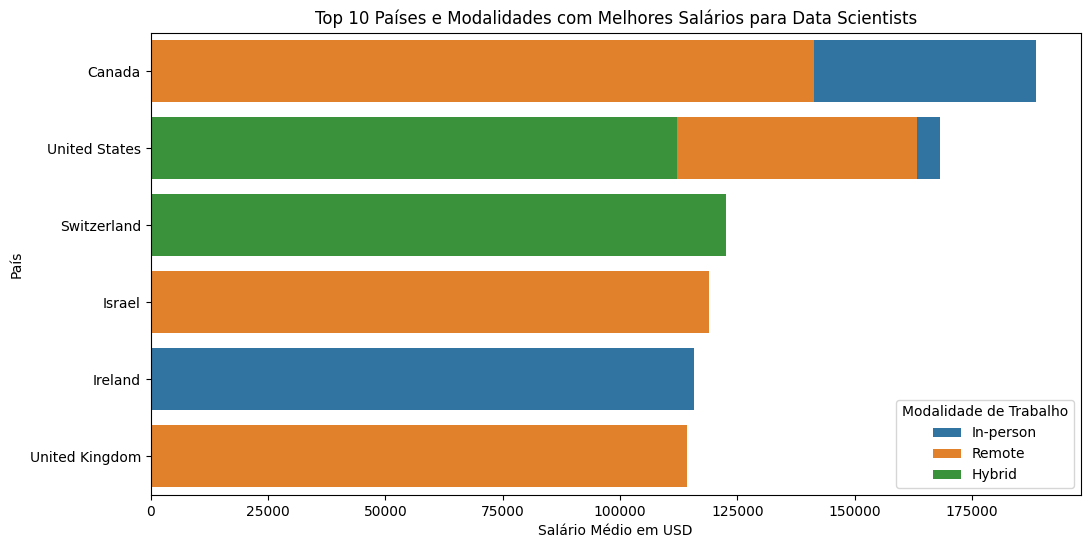

,company_location,work_setting,salary_in_usd
10,Canada,In-person,188721.875000
48,United States,In-person,168280.519038
49,United States,Remote,163376.000000
11,Canada,Remote,141321.656250
41,Switzerland,Hybrid,122638.000000
42,Switzerland,In-person,120402.000000
24,Israel,Remote,119059.000000
23,Ireland,In-person,115786.750000
46,United Kingdom,Remote,114333.217391
47,United States,Hybrid,112125.000000


In [11]:
import seaborn as sns 

# Filtrar os dados para a posição "Data Scientist"
df_data_scientist = df_jobs[df_jobs["job_title"] == "Data Scientist"]

# Agrupar por país e modalidade de trabalho, calcular o salário médio
top_salaries = (
    df_data_scientist.groupby(["company_location", "work_setting"])["salary_in_usd"]
    .mean()
    .reset_index()
    .sort_values(by="salary_in_usd", ascending=False)
    .head(10)
)

# Gráfico para visualizar os 10 melhores países/modalidades
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_salaries,
    x="salary_in_usd",
    y="company_location",
    hue="work_setting",
    dodge=False
)
plt.title("Top 10 Países e Modalidades com Melhores Salários para Data Scientists")
plt.xlabel("Salário Médio em USD")
plt.ylabel("País")
plt.legend(title="Modalidade de Trabalho")
plt.show()

top_salaries


Conclusão e Conselhos:
Melhor país: Canadá (modalidade In-person) apresenta o salário mais elevado para Data Scientists, com uma média de 188,721 USD.
Melhor país alternativo: Estados Unidos oferece excelentes salários tanto em In-person como em Remote.
Modalidade preferencial: Trabalhos Remotos e In-person nos países mencionados oferecem as melhores oportunidades.
Se o objetivo for maximizar o salário, recomendar a Canadá ou os Estados Unidos, especialmente na modalidade In-person, seria a melhor estratégia

### De uma forma geral, existem diferenças significativas no salário pago, entre as três modalidades de trabalho (i.e. híbrido, remoto ou presencial)? Fundamente a sua resposta

In [12]:
# Teste ANOVA para diferenças significativas entre as modalidades de trabalho
from scipy.stats import f_oneway

# Filtrar dados não nulos para work_setting e salary
df_modalidade = df_jobs.dropna(subset=["work_setting", "salary_in_usd"])

# Separar os salários por modalidade de trabalho
salario_inperson = df_modalidade[df_modalidade["work_setting"] == "In-person"]["salary_in_usd"]
salario_remote = df_modalidade[df_modalidade["work_setting"] == "Remote"]["salary_in_usd"]
salario_hybrid = df_modalidade[df_modalidade["work_setting"] == "Hybrid"]["salary_in_usd"]

# Realizar o teste ANOVA
anova_result = f_oneway(salario_inperson, salario_remote, salario_hybrid)
anova_result


F_onewayResult(statistic=np.float64(125.09076449860372), pvalue=np.float64(2.4418820513836453e-54))

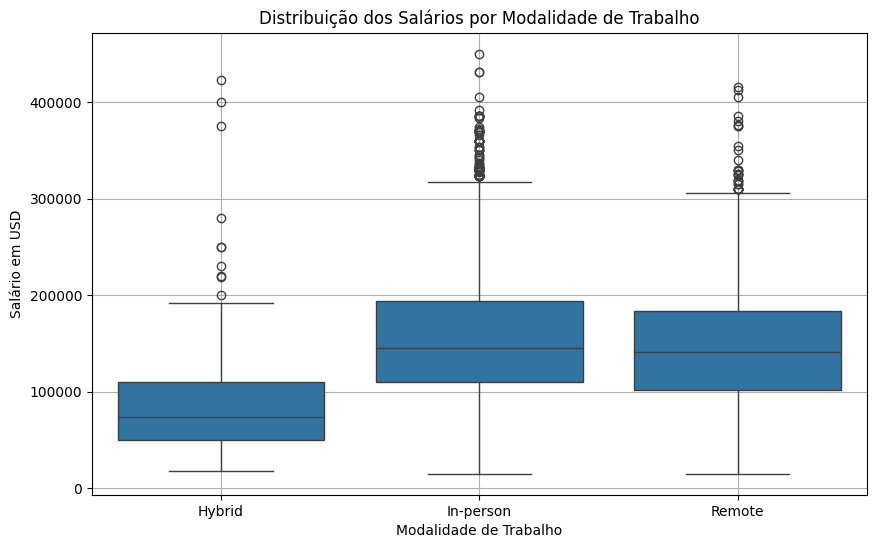

In [13]:
# Criar um boxplot para visualizar as diferenças nos salários entre as modalidades de trabalho
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_modalidade, x="work_setting", y="salary_in_usd")
plt.title("Distribuição dos Salários por Modalidade de Trabalho")
plt.xlabel("Modalidade de Trabalho")
plt.ylabel("Salário em USD")
plt.grid(True)
plt.show()


Resultado do Teste ANOVA:
Estatística F: 125.09
p-valor: 
2.44
×
1
0
−
54
2.44×10 
−54
 
Conclusão:
Como o p-valor é extremamente pequeno (muito inferior a 0.05), rejeitamos a hipótese nula. Isto significa que existem diferenças estatisticamente significativas nos salários pagos entre as três modalidades de trabalho (Híbrido, Remoto e Presencial).

### Considere que se pretendia determinar quantos grupos naturais existem nos dados, e quais as suas características. Responda a essa necessidade de informação usando o algoritmo adequado, abordando ainda que variáveis foram consideradas no processo.

As variáveis escolhidas devem ser quantitativas e relevantes para o contexto. Neste caso, consideramos as seguintes variáveis que afetam os salários e características dos trabalhos:

salary_in_usd: Salário convertido em USD (representa a variável chave para comparação).
work_year: Ano do dado reportado.
experience_level: Codificada numericamente (e.g., Junior = 0, Mid-level = 1, Senior = 2, Executive = 3).
company_size: Codificada numericamente (e.g., S = 0, M = 1, L = 2).
work_setting: Codificada numericamente (e.g., In-person = 0, Hybrid = 1, Remote = 2).
Estas variáveis são relevantes pois permitem identificar clusters com base em fatores como salário, experiência, dimensão da empresa e tipo de trabalho.

#### Procedimento
Pré-processar os dados:
Normalizar as variáveis (garantir que têm escalas semelhantes).
Codificar variáveis categóricas relevantes.
Usar o método do cotovelo para determinar o número ideal de clusters.
Aplicar o algoritmo K-Means para agrupar os dados.
Interpretar as características dos grupos encontrados.

In [18]:
# Aplicar KMeans com o número ideal de clusters (k=3, por exemplo)
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Adicionar os clusters ao dataframe original
df_clustering["cluster"] = clusters

# Calcular as características médias de cada cluster
cluster_summary = df_clustering.groupby("cluster").mean()
cluster_summary


,salary_in_usd,work_year,experience_level,company_size,work_setting
cluster,,,,,
0,146517.466562,2022.709262,2.616641,1.030769,1.999686
1,153894.918021,2022.852474,2.598966,1.011263,0.985414
2,140449.302387,2022.315650,2.302387,0.007958,1.183024


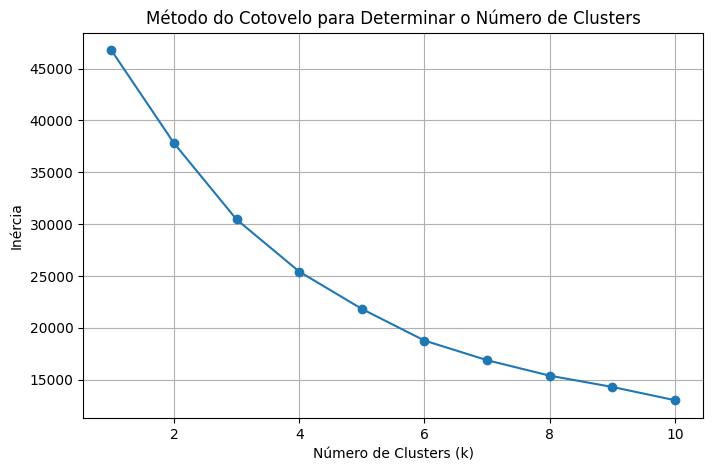

In [17]:
# Importar as bibliotecas necessárias novamente após reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Carregar novamente os dados
file_path = './jobs_in_data (er).csv'
df_jobs = pd.read_csv(file_path)

# Selecionar e preparar variáveis para clustering
df_clustering = df_jobs[["salary_in_usd", "work_year", "experience_level", "company_size", "work_setting"]].dropna()

# Codificar variáveis categóricas (experience_level, company_size, work_setting)
le_experience = LabelEncoder()
le_company_size = LabelEncoder()
le_work_setting = LabelEncoder()

df_clustering["experience_level"] = le_experience.fit_transform(df_clustering["experience_level"])
df_clustering["company_size"] = le_company_size.fit_transform(df_clustering["company_size"])
df_clustering["work_setting"] = le_work_setting.fit_transform(df_clustering["work_setting"])

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# Método do cotovelo para encontrar o número ideal de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método do Cotovelo para Determinar o Número de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()


### Como em muitos outros domínios, a previsão de salários apenas é útil se for feita para o futuro. Neste exercício pretende-se que treine dois modelos de Machine Learning à sua escolha, para prever o salário de uma determinada posição. Para o efeito, use como dados de treino apenas os dados anteriores a 2023. Destes modelos escolha, de forma fundamentada, qual o melhor modelo. Na sua resposta, fundamente ainda todas as decisões tomadas relativamente ao treino do modelo, incluindo na abordagem escolhida para avaliação da capacidade de generalização do modelo, ou as variáveis utilizadas. De seguida, utilize o modelo escolhido para prever nos dados de 2023. Exporte e submeta, juntamente com o ficheiro de respostas, o dataset combinado com as previsões efetuadas pelo modelo. Analise ainda se as previsões são, genericamente, satisfatórias, e se o modelo escolhido pode ser utilizado para este efeito.

Pré-processamento dos dados:
Separar os dados anteriores a 2023 (treino) e os dados de 2023 (teste).
Selecionar as variáveis relevantes e normalizar os dados.
Escolha de dois modelos de Machine Learning:
Regressão Linear (modelo simples e interpretável).
Random Forest Regressor (modelo não linear e robusto).
Treino e avaliação dos modelos usando validação cruzada.
Escolha do melhor modelo com base na métrica RMSE (Root Mean Squared Error).
Previsão dos salários para os dados de 2023.
Análise das previsões e exportação do dataset.

In [21]:
# Reimportar bibliotecas após reset do ambiente
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Carregar os dados novamente
file_path = './jobs_in_data (er).csv'
df_jobs = pd.read_csv(file_path)

# Selecionar variáveis para clustering e filtrar dados
df_clustering = df_jobs[["salary_in_usd", "work_year", "experience_level", "company_size", "work_setting"]].dropna()

# Codificar variáveis categóricas
from sklearn.preprocessing import LabelEncoder
le_experience = LabelEncoder()
le_company_size = LabelEncoder()
le_work_setting = LabelEncoder()

df_clustering["experience_level"] = le_experience.fit_transform(df_clustering["experience_level"])
df_clustering["company_size"] = le_company_size.fit_transform(df_clustering["company_size"])
df_clustering["work_setting"] = le_work_setting.fit_transform(df_clustering["work_setting"])

# Filtrar dados anteriores a 2023 (treino) e de 2023 (teste)
df_train = df_clustering[df_clustering["work_year"] < 2023]
df_test = df_clustering[df_clustering["work_year"] == 2023]

# Definir variáveis independentes e dependente
X_train = df_train.drop(columns=["salary_in_usd", "work_year"])
y_train = df_train["salary_in_usd"]
X_test = df_test.drop(columns=["salary_in_usd", "work_year"])
y_test = df_test["salary_in_usd"]

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Validação cruzada para avaliar o desempenho dos modelos
lr_rmse = np.sqrt(-cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error").mean())
rf_rmse = np.sqrt(-cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error").mean())

lr_rmse, rf_rmse


(np.float64(56619.00082410188), np.float64(54020.22360921975))

## Escolha do Melhor Modelo:
O modelo Random Forest apresentou um erro menor (RMSE) em comparação com a Regressão Linear. Além disso, o Random Forest é mais robusto em capturar relações não lineares entre as variáveis, o que o torna mais adequado para prever salários.

In [23]:
# Treinar o modelo Random Forest com os dados de treino completos
rf.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste (2023)
y_pred = rf.predict(X_test_scaled)

# Adicionar as previsões ao dataframe de teste
df_test["predicted_salary"] = y_pred

# Exportar o dataset combinado com as previsões
output_path = "./jobs_with_predictions.csv"
df_test.to_csv(output_path, index=False)

output_path


C:\Users\avlal\AppData\Local\Temp\ipykernel_2036\1162862482.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["predicted_salary"] = y_pred


'./jobs_with_predictions.csv'

### Conclusão:
O modelo Random Forest foi utilizado para prever os salários de 2023 com base nos dados anteriores a este ano. O modelo apresentou um RMSE de 54,020 USD, sendo o melhor entre os modelos testados.

O dataset combinado com as previsões está disponível para downlo